In [0]:
!sudo pip install mtcnn

     |████████████████████████████████| 2.3MB 2.8MB/s 


In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [0]:
!kaggle datasets download -d jessicali9530/celeba-dataset

100% 1.33G/1.33G [00:14<00:00, 123MB/s]
100% 1.33G/1.33G [00:14<00:00, 97.2MB/s]


In [0]:
!unzip '/content/drive/My Drive/Kaggle/celeba-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/158207.jpg  
  inflating: img_align_celeba/img_align_celeba/158208.jpg  
  inflating: img_align_celeba/img_align_celeba/158209.jpg  
  inflating: img_align_celeba/img_align_celeba/158210.jpg  
  inflating: img_align_celeba/img_align_celeba/158211.jpg  
  inflating: img_align_celeba/img_align_celeba/158212.jpg  
  inflating: img_align_celeba/img_align_celeba/158213.jpg  
  inflating: img_align_celeba/img_align_celeba/158214.jpg  
  inflating: img_align_celeba/img_align_celeba/158215.jpg  
  inflating: img_align_celeba/img_align_celeba/158216.jpg  
  inflating: img_align_celeba/img_align_celeba/158217.jpg  
  inflating: img_align_celeba/img_align_celeba/158218.jpg  
  inflating: img_align_celeba/img_align_celeba/158219.jpg  
  inflating: img_align_celeba/img_align_celeba/158220.jpg  
  inflating: img_align_celeba/img_align_celeba/158221.jpg  
  inflating: img_align_celeba/img_align_celeba/15

# Prepare the Celebrity Faces Dataset

As we are only interested in the face in each photo and not the background, we can perform face detection and extract only the face before resizing the result to a fixed size.

We will use a pre-trained Multi-Task Cascaded Convolutional Neural Network, or MTCNN.

In [0]:
from os import listdir
from numpy import asarray
from numpy import savez_compressed
from PIL import Image
from mtcnn.mtcnn import MTCNN


In [0]:
#load an image as an rgb numpy array
def load_image(filename):
  #load image from file
  image=Image.open(filename)
  #convert to RGB, if needed
  image=image.convert('RGB')
  #convert to array
  pixels=asarray(image)
  return pixels

In [0]:
#extract the face from a loaded image and resize
def extract_face(model,pixels,required_size=(128,128)):
  #detect face in the image
  faces=model.detect_faces(pixels)
  #skip cases where no face detected
  if len(faces)==0:
    return None
  #extract details of the face
  x1,y1,width,height=faces[0]['box']
  #force detected pixel values to be +ve
  x1,y1=abs(x1),abs(y1)
  #convert into coordinates
  x2,y2=x1+width,y1+height
  #retrieve face pixels
  face_pixels=pixels[y1:y2,x1:x2]
  #resize pixels to the model size
  image=Image.fromarray(face_pixels)
  image=image.resize(required_size)
  face_array=asarray(image)
  return face_array

In [0]:
#load images and extract faces for all images in a directory
def load_faces(directory,n_faces):
  #prepare model
  model=MTCNN()
  faces=list()
  #enumerate files
  for filename in listdir(directory):
    #load the image
    pixels=load_image(directory+filename)
    #get face
    face=extract_face(model,pixels)
    if face is None:
      continue
    #store
    faces.append(face)
    print(len(faces),face.shape)
    #stop when we get required no.of faces
    if len(faces)>=n_faces:
      break
  return asarray(faces)

In [0]:
# directory that contains all images
directory = '/content/drive/My Drive/Kaggle/img_align_celeba/img_align_celeba/'
#load and extract all faces
all_faces=load_faces(directory,50000)

Streaming output truncated to the last 5000 lines.
45002 (128, 128, 3)
45003 (128, 128, 3)
45004 (128, 128, 3)
45005 (128, 128, 3)
45006 (128, 128, 3)
45007 (128, 128, 3)
45008 (128, 128, 3)
45009 (128, 128, 3)
45010 (128, 128, 3)
45011 (128, 128, 3)
45012 (128, 128, 3)
45013 (128, 128, 3)
45014 (128, 128, 3)
45015 (128, 128, 3)
45016 (128, 128, 3)
45017 (128, 128, 3)
45018 (128, 128, 3)
45019 (128, 128, 3)
45020 (128, 128, 3)
45021 (128, 128, 3)
45022 (128, 128, 3)
45023 (128, 128, 3)
45024 (128, 128, 3)
45025 (128, 128, 3)
45026 (128, 128, 3)
45027 (128, 128, 3)
45028 (128, 128, 3)
45029 (128, 128, 3)
45030 (128, 128, 3)
45031 (128, 128, 3)
45032 (128, 128, 3)
45033 (128, 128, 3)
45034 (128, 128, 3)
45035 (128, 128, 3)
45036 (128, 128, 3)
45037 (128, 128, 3)
45038 (128, 128, 3)
45039 (128, 128, 3)
45040 (128, 128, 3)
45041 (128, 128, 3)
45042 (128, 128, 3)
45043 (128, 128, 3)
45044 (128, 128, 3)
45045 (128, 128, 3)
45046 (128, 128, 3)
45047 (128, 128, 3)
45048 (128, 128, 3)
45049 (12

In [0]:
#shape of all faces
print('Loaded: ', all_faces.shape)
# save in compressed format
savez_compressed('img_align_celeba_128.npz', all_faces)

Loaded:  (50000, 128, 128, 3)


In [0]:
#plot a list of loaded faces
def plot_faces(faces,n):
  for i in range(n*n):
    #define subplot
    plt.subplot(n,n,1+i)
    #turn off axis
    plt.axis('off')
    #plot pixel data
    plt.imshow(faces[i].astype('uint8'))
  plt.show()

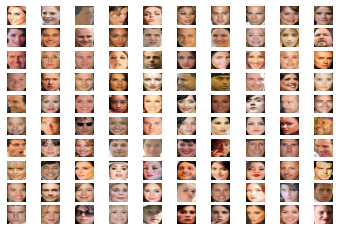

In [0]:
plot_faces(all_faces,10)

# Develop Progresive Growing GAN Models

In [0]:
from math import sqrt
from numpy import load
from numpy import asarray
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from skimage.transform import resize
from keras.optimizers import Adam
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import UpSampling2D
from keras.layers import AveragePooling2D
from keras.layers import LeakyReLU
from keras.layers import Layer
from keras.layers import Add
from keras.constraints import max_norm
from keras.initializers import RandomNormal
from keras import backend
from matplotlib import pyplot as plt

### Progressive Growing Custom Layers
There are three custom layers required to implement the progressive growing generative adversarial network.

**WeightedSum:** Used to control the weighted sum of the old and new layers during a growth phase.

**MinibatchStdev:** Used to summarize statistics for a batch of images in the discriminator.

**PixelNormalization:** Used to normalize activation maps in the generator model.

In [0]:
#weighted sum output
"""The WeightedSum layer is a merge layer that combines the activations from two
 input layers, such as two input paths in a discriminator or two output paths in
  a generator model. It uses a variable called alpha that controls how much to 
  weight the first and second inputs."""
class WeightedSum(Add):
  #init with default value
  def __init__(self,alpha=0.0,**kwargs):
    super(WeightedSum,self).__init__(**kwargs)
    self.alpha=backend.variable(alpha,name='ws_alpha')

  #output a weighted sum of inputs
  def _merge_function(self,inputs):
    #only supports a weighted sum of two inputs
    assert (len(inputs)==2)
    #((1-a)*input1)+(a*input2)
    output=((1.0-self.alpha)*inputs[0])+(self.alpha*inputs[1])
    return output 


In [0]:
#mini-batch standard deviation layer
"""The objective of the layer is to provide a statistical summary of the batch of
   activations.The discriminator can then learn to better detect batches of fake
   samples from batches of real samples.
   This, in turn, encourages the generator that is trained via the discriminator
   to create batches of samples with realistic batch statistics.
   It is implemented as calculating the standard deviation for each pixel 
   value in the activation maps across the batch, calculating the average of this
   value,and then creating a new activation map (one channel) that is appended 
   to the list of activation maps provided as input."""
class MinibatchStdev(Layer):
  #initialize the layer
  def __init__(self,**kwargs):
    super(MinibatchStdev,self).__init__(**kwargs)
  
  #perform the operation
  def call(self,inputs):
    #calculate mean value for each pixel across channels
    mean=backend.mean(inputs,axis=0,keepdims=True)
    #calculate the squared difference b/w pixel values and mean 
    squ_diffs=backend.square(inputs-mean)
    #calculate the avg of the squared differences(variance)
    mean_sq_diff=backend.mean(squ_diffs,axis=0,keepdims=True)
    #ensure the mean is not zero
    mean_sq_diff+=1e-8
    #square root of the varaince(stddev) 
    stddev=backend.sqrt(mean_sq_diff)
    #calculate the mean standard deviation across each pixel
    mean_pix=backend.mean(stddev,keepdims=True)
    #scale this upto the size of one input feature map for each sample
    shape=backend.shape(inputs)
    output=backend.tile(mean_pix,(shape[0],shape[1],shape[2],1))
    #concatenate with the output
    combined=backend.concatenate([inputs,output],axis=-1)
    return combined

  #define the output shape of the layer
  def compute_output_shape(self,input_shape):
    #create a copy of the input shape as a list
    input_shape=list(input_shape)
    #add one to the channel dimemsion (assume channels-last)
    input_shape[-1]+=1
    #convert list to a tuple
    return tuple(input_shape)

In [0]:
#pixel wise feature vector normalization layer
"""each pixel in the activation maps is normalized to unit length.
   Also, unlike other GAN models, normalization is only used in the generator 
   model, not the discriminator."""
class PixelNormalization(Layer):
  #initialize the layer
  def __init__(self,**kwargs):
    super(PixelNormalization,self).__init__(**kwargs)

  #perform the operation
  def call(self,inputs):
    #calculate square pixel values
    values=inputs**2.0
    #calculate the mean pixel values
    mean_values=backend.mean(values,axis=-1,keepdims=True)
    #ensure the mean is not zero
    mean_values+=1.0e-8
    #calculate the sqrt of the mean squared value (l2 norm)
    l2=backend.sqrt(mean_values)
    #normalize values by l2 norm
    normalized=inputs/l2
    return normalized

  #define the output shape of the layer
  def compute_output_shape(self,input_shape):
    return input_shape

### Progressive Growing Discriminator Model


In [0]:
#calculate wasserstein loss
"""First, we must define the loss function as the average predicted value
 multiplied by the target value. The target value will be 1 for real images 
 and -1 for fake images. This means that weight updates will seek to increase 
 the divide between real and fake images."""
def wasserstein_loss(y_true,y_pred):
  return backend.mean(y_true*y_pred)

In [0]:
#add a discriminator block
def add_discriminator_block(old_model,n_input_layers=3):
  #weight initialization
  init=RandomNormal(stddev=0.02)
  #weight constraint
  const=max_norm(1.0)
  #get shape of existing model
  in_shape=list(old_model.input.shape)
  #define new input shape as double the size
  input_shape=(in_shape[-2]*2,in_shape[-2]*2,in_shape[-1])
  in_image=Input(shape=input_shape)
  #define new input processing layer
  d=Conv2D(128,(1,1),padding='same',kernel_initializer=init,kernel_constraint=const)(in_image)
  d=LeakyReLU(alpha=0.2)(d)
  #define new block
  d=Conv2D(128,(3,3),padding='same',kernel_initializer=init,kernel_constraint=const)(d)
  d=LeakyReLU(alpha=0.2)(d)
  d=Conv2D(128,(3,3),padding='same',kernel_initializer=init,kernel_constraint=const)(d)
  d=LeakyReLU(alpha=0.2)(d)
  d=AveragePooling2D()(d)
  block_new=d
  #skip the input,1X1 and activation for the old model
  for i in range(n_input_layers,len(old_model.layers)):
    d=old_model.layers[i](d)
  #define straight through model
  model1=Model(in_image,d)
  #compile model
  model1.compile(loss=wasserstein_loss,optimizer=Adam(lr=0.001,beta_1=0,beta_2=0.99,epsilon=10e-8))
  #downsample the new larger image
  downsample=AveragePooling2D()(in_image)
  #connect old input processing to downsampled new input
  block_old=old_model.layers[1](downsample)
  block_old=old_model.layers[2](block_old)
  #fade in output of old model input layer with new input
  d=WeightedSum()([block_old,block_new])
  #skip the input, 1X1 and activation for the old model
  for i in range(n_input_layers,len(old_model.layers)):
    d=old_model.layers[i](d)
  #define straight-through model
  model2=Model(in_image,d)
  #compile model
  model2.compile(loss=wasserstein_loss,optimizer=Adam(lr=0.001,beta_1=0,beta_2=0.99,epsilon=10e-8))
  return [model1,model2]
    

In [0]:
#define the discriminator models for each image resolution
def define_discriminator(n_blocks,input_shape=(4,4,3)):
  #weight initialization
  init=RandomNormal(stddev=0.02)
  #weight constraint
  const=max_norm(1.0)
  model_list=list()
  #base model input
  in_image=Input(shape=input_shape)
  #conv 1X1
  d=Conv2D(128,(1,1),padding='same',kernel_initializer=init,kernel_constraint=const)(in_image)
  d=LeakyReLU(alpha=0.2)(d)
  #conv 3X3 (output block)
  d=MinibatchStdev()(d)
  d=Conv2D(128,(3,3),padding='same',kernel_initializer=init,kernel_constraint=const)(d)
  d=LeakyReLU(alpha=0.2)(d)
  #conv 4X4 
  d=MinibatchStdev()(d)
  d=Conv2D(128,(4,4),padding='same',kernel_initializer=init,kernel_constraint=const)(d)
  d=LeakyReLU(alpha=0.2)(d)
  #dense output layer
  d=Flatten()(d)
  out_class=Dense(1)(d)
  #define model
  model=Model(in_image,out_class)
  #compile model
  model.compile(loss=wasserstein_loss,optimizer=Adam(lr=0.001,beta_1=0,beta_2=0.99,epsilon=10e-8))
  #store model
  model_list.append([model,model])
  #create submodels
  for i in range(1,n_blocks):
    #get prior model without fade-on
    old_model=model_list[i-1][0]
    #create new model for next resolution
    models=add_discriminator_block(old_model)
    #store model
    model_list.append(models)
  return model_list

### Progressive Growing Generator Model

In [0]:
#add a generator block
def add_generator_block(old_model):
  #weight initialization
  init=RandomNormal(stddev=0.02)
  #weight constraint
  const=max_norm(1.0)
  #get the end of the last block
  block_end=old_model.layers[-2].output
  #upsample, and define new block
  upsampling=UpSampling2D()(block_end)
  g=Conv2D(128,(3,3),padding='same',kernel_initializer=init,kernel_constraint=const)(upsampling)
  g=PixelNormalization()(g)
  g=LeakyReLU(alpha=0.2)(g)
  #add new output layer 
  out_image=Conv2D(3,(1,1),padding='same',kernel_initializer=init,kernel_constraint=const)(g)
  #define model
  model1=Model(old_model.input,out_image)
  #get the output layer from old model
  out_old=old_model.layers[-1]
  #connect the upsampling to the old output layer
  out_image2=out_old(upsampling)
  #define new output image as the weighted sum of the old and new models
  merged=WeightedSum()([out_image2,out_image])
  #define model
  model2=Model(old_model.input,merged)
  return [model1,model2]
  

In [0]:
#define generator model
def define_generator(latent_dim,n_blocks,in_dim=4):
  #weight initialization
  init=RandomNormal(stddev=0.02)
  #weight constraint
  const=max_norm(1.0)
  model_list=list()
  #base model latent input
  in_latent=Input(shape=(latent_dim,))
  #linear scale upto activation maps
  g=Dense(128 * in_dim *in_dim,kernel_initializer=init,kernel_constraint=const)(in_latent)
  g=Reshape((in_dim,in_dim,128))(g)
  #conv 4X4, input block
  g=Conv2D(128,(4,4),padding='same',kernel_initializer=init,kernel_constraint=const)(g)
  g=PixelNormalization()(g)
  g=LeakyReLU(alpha=0.2)(g)
  #conv 3X3
  g=Conv2D(128,(3,3),padding='same',kernel_initializer=init,kernel_constraint=const)(g)
  g=PixelNormalization()(g)
  g=LeakyReLU(alpha=0.2)(g)
  #conv 1X1,output block
  out_image=Conv2D(3,(1,1),padding='same',kernel_initializer=init,kernel_constraint=const)(g)
  #define model
  model=Model(in_latent,out_image)
  #store model
  model_list.append([model,model])
  #create submodels
  for i in range(1,n_blocks):
    #get prior model without the fade-on
    old_model=model_list[i-1][0]
    #create new model for next resolution
    models=add_generator_block(old_model)
    #store model
    model_list.append(models)
  return model_list

### Composite Models for Training the Generators

In [0]:
#define composite models for training generators via discriminators
def define_composite(discriminators,generators):
  model_list=list()
  #create composite models
  for i in range(len(discriminators)):
    g_models,d_models=generators[i],discriminators[i]
    #straight through model
    d_models[0].trainable=False
    model1=Sequential()
    model1.add(g_models[0])
    model1.add(d_models[0])
    model1.compile(loss=wasserstein_loss,optimizer=Adam(lr=0.001,beta_1=0,beta_2=0.99,epsilon=10e-8))
    #fade-in model
    d_models[1].trainable=False
    model2=Sequential()
    model2.add(g_models[1])
    model2.add(d_models[1])
    model2.compile(loss=wasserstein_loss,optimizer=Adam(lr=0.001,beta_1=0,beta_2=0.99,epsilon=10e-8))
    #store
    model_list.append([model1,model2])
  return model_list

#Model and data preparation

In [0]:
#select real samples
def generate_real_samples(dataset,n_samples):
  #choose random instances
  ix=randint(0,dataset.shape[0],n_samples)
  #select images
  X=dataset[ix]
  #generate labels
  y=ones((n_samples,1))
  return X,y

In [0]:
#generate points in latent space as input for the generator
def generate_latent_points(latent_dim,n_samples):
  #generate points in the latent space
  x_input=randn(latent_dim*n_samples)
  #reshape into a batch of inputs for the network
  x_input=x_input.reshape(n_samples,latent_dim)
  return [x_input]

In [0]:
#generating n fake examples,with class labels
def generate_fake_samples(generator,latent_dim,n_samples):
  #generate points in latent space
  x_input=generate_latent_points(latent_dim,n_samples)
  #predict outputs
  images=generator.predict(x_input)
  #create class labels
  y=-ones((n_samples,1))
  return images,y

In [0]:
#update the alpha value on each instance of weightedsum
def  update_fadein(models,step,n_steps):
  #calculate current alpha(linear from 0 to 1)
  alpha=step/float(n_steps-1)
  #update the alpha for each model
  for model in models:
    for layer in model.layers:
      if isinstance(layer,weightedsum):
        backend.set_value(layer.alpha,alpha)

In [0]:
#scale images to preferred size
def scale_dataset(images,new_shape):
  images_list=list()
  for image in images:
    #resize with nearest neighbour interpolation
    new_image=resize(image,new_shape,0)
    #store
    images_list.append(new_image)
  return asarray(images_list)

In [0]:
#generate samples and save as a plot and save the model
def summarize_performance(status,g_model,latent_dim,n_samples=25):
  gen_shape=g_model.output_shape
  name='%03dx%03d-%s'%(gen_shape[1],gen_shape[2],status)
  #generate images
  X,_=generate_fake_samples(g_model,latent_dim,n_samples)
  #normalize pixel values to the range [0,1]
  X=(X-X.min())/(X.max()-X.min())
  #plot real images
  square=int(sqrt(n_samples))
  for i in range(n_samples):
    plt.subplot(square,square,1+i)
    plt.axis('off')
    plt.imshow(X[i])
  #save plot to file
  filename1='plot_%s.png' %(name)
  plt.savefig(filename1)
  plt.close()
  #save the generator model
  filename2='model_%s.h5' %(name)
  g_model.save(filename2)
  print('>Saved: %s and %s' %(filename1,filename2))

# How to Train Progressive Growing GAN Models

In [0]:
#train a generator and discriminator
def train_epochs(g_model,d_model,gan_model,dataset,n_epochs,n_batch,fadein=False):
  #no.of batches per training epoch
  bat_per_epo=int(dataset.shape[0]/n_batch)
  n_steps=bat_per_epo*n_epochs
  #calculate the size of half of a batch of samples
  half_batch=int(n_batch/2)
  #manually enumerate epochs
  for i in range(n_steps):
    #update alpha for all WeightedSum layers when fading in new blocks
    if fadein:
      update_fadein([g_model,d_model,gan_model],i,n_steps)
    #prepare real and fake samples
    X_real,y_real=generate_real_samples(dataset,half_batch)
    X_fake,y_fake=generate_fake_samples(g_model,latent_dim,half_batch)
    #update discriminator model
    d_loss1=d_model.train_on_batch(X_real,y_real)
    d_loss2=d_model.train_on_batch(X_fake,y_fake)
    #update the generator via the discriminator's error
    z_input=generate_latent_points(latent_dim,n_batch)
    y_real2=ones((n_batch,1))
    g_loss=gan_model.train_on_batch(z_input,y_real2)
    #summarize loss on this batch
    print('>%d d1=%.3f d2=%.3f g=%.3f' % (i+1,d_loss1,d_loss2,g_loss))
    

In [0]:
#train the generator and discriminator
def train(g_models,d_models,gan_models,dataset,latent_dim,e_norm,e_fadein,n_batch):
  #fit the baseline model
  g_normal,d_normal,gan_normal= g_models[0][0],d_models[0][0],gan_models[0][0]
  #scale dataset to appropriate size
  gen_shape=g_normal.output_shape
  scaled_data=scale_dataset(dataset,gen_shape[1:])
  print('Scaled Data', scaled_data.shape)
  #train normal or straight-through models
  train_epochs(g_normal,d_normal,gan_normal,scaled_data,e_norm[0],n_batch[0])
  summarize_performance('tuned',g_normal,latent_dim)
  #process each level of growth
  for i in range(1,len(g_models)):
    #retrieve models for this level of growth
    [g_normal,g_fadein]=g_models[i]
    [d_normal,d_fadein]=d_models[i]
    [gan_normal,gan_fadein]=gan_models[i]
    #scale dataset to appropriate size
    gen_shape=g_normal.output_shape
    print('Scaled Data',scaled_data.shape)
    #train fade-in models for next level of growth
    train_epochs(g_fadein, d_fadein, gan_fadein, scaled_data, e_fadein[i], n_batch[i], True)
    summarize_performance('faded',g_fadein,latent_dim)
    #train normal or straight through models
    train_epochs(g_normal,gan_normal,scaled_data,e_norm[i],n_batch[i])
    summarize_performance('tuned',g_normal,latent_dim)
    


In [0]:
# number of growth phases, e.g. 6 == [4, 8, 16, 32, 64, 128]
n_blocks = 6
# size of the latent space
latent_dim = 100


In [27]:
# define models
d_models = define_discriminator(n_blocks)
# define models
g_models = define_generator(latent_dim, n_blocks)
# define composite models
gan_models = define_composite(d_models, g_models)


tracking <tf.Variable 'ws_alpha:0' shape=() dtype=float32, numpy=0.0> alpha
tracking <tf.Variable 'ws_alpha:0' shape=() dtype=float32, numpy=0.0> alpha
tracking <tf.Variable 'ws_alpha:0' shape=() dtype=float32, numpy=0.0> alpha
tracking <tf.Variable 'ws_alpha:0' shape=() dtype=float32, numpy=0.0> alpha
tracking <tf.Variable 'ws_alpha:0' shape=() dtype=float32, numpy=0.0> alpha
tracking <tf.Variable 'ws_alpha:0' shape=() dtype=float32, numpy=0.0> alpha
tracking <tf.Variable 'ws_alpha:0' shape=() dtype=float32, numpy=0.0> alpha
tracking <tf.Variable 'ws_alpha:0' shape=() dtype=float32, numpy=0.0> alpha
tracking <tf.Variable 'ws_alpha:0' shape=() dtype=float32, numpy=0.0> alpha
tracking <tf.Variable 'ws_alpha:0' shape=() dtype=float32, numpy=0.0> alpha


In [0]:
# load image data
dataset = load('/content/drive/My Drive/Kaggle/img_align_celeba_128.npz')


In [0]:
X=dataset['arr_0']


In [4]:
X.shape

(50000, 128, 128, 3)

In [0]:
for i in range(50000):
  X[i,:,:,:]=X[i,:,:,:].astype('float32')
  X[i,:,:,:]=(X[i,:,:,:]-127.5)/127.5


In [0]:
dataset=X

In [34]:
# train model
n_batch = [16, 16, 16, 8, 4, 4]
# 10 epochs == 500K images per training phase
n_epochs = [5, 8, 8, 10, 10, 10]
train(g_models, d_models, gan_models, dataset, latent_dim, n_epochs, n_epochs, n_batch)

Scaled Data (50000, 4, 4, 3)


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Streaming output truncated to the last 5000 lines.
>10627 d1=261444.453 d2=-714161.312 g=1211131.000
>10628 d1=318959.312 d2=-519418.875 g=1100975.250
>10629 d1=716653.000 d2=-1588793.250 g=2098728.000
>10630 d1=507564.000 d2=-673101.000 g=1286940.500
>10631 d1=876465.250 d2=-1003780.500 g=1795892.750
>10632 d1=548047.812 d2=-1572944.000 g=2216429.500
>10633 d1=391175.531 d2=-384189.656 g=646889.625
>10634 d1=414771.406 d2=-1241180.250 g=1825405.375
>10635 d1=543537.250 d2=-1901404.500 g=2214066.250
>10636 d1=577799.875 d2=-1684329.625 g=2201296.250
>10637 d1=447743.188 d2=-339715.875 g=659873.500
>10638 d1=265415.656 d2=-1449361.375 g=2246416.000
>10639 d1=673672.000 d2=-1686115.750 g=2092243.500
>10640 d1=508103.250 d2=-973873.188 g=1611202.500
>10641 d1=491516.719 d2=-599481.062 g=1067720.125
>10642 d1=716499.062 d2=-1629255.500 g=2190975.500
>10643 d1=621946.250 d2=-867360.125 g=1476371.500
>10644 d1=418083.844 d2=-484082.969 g=1022023.312
>10645 d1=386137.344 d2=-1476030.000 g=196

NameError: ignored

# Synthesize Images With a Progressive Growing GAN Model

In [0]:
#create plot of generated images
def plot_generated(images,n_images):
  #plot images
  square=int(sqrt(n_images))
  #normalize pixel values to the range [0,1]
  images=(images-images.min())/(images.max()-images.min())
  for i in range(n_images):
    #define subplot
    plt.subplot(square,square,1+i)
    #turn off axis
    plt.axis('off')
    #plot raw pixel data
    plt.imshow(images[i])
  plt.show()

In [0]:
# load model
cust = {'PixelNormalization': PixelNormalization, 'MinibatchStdev': MinibatchStdev, 'WeightedSum': WeightedSum}
model = load_model('model_016x016-tuned.h5', cust)
# size of the latent space
latent_dim = 100
# number of images to generate
n_images = 25
# generate images
latent_points = generate_latent_points(latent_dim, n_images)
# generate images
X  = model.predict(latent_points)
# plot the result
plot_generated(X, n_images)

# Extensions

**Change Alpha via Callback.** Update the example to use a Keras callback to update the alpha value for the WeightedSum layers during fade-in training.

**Pre-Scale Dataset.** Update the example to pre-scale each dataset and save each version to file to be loaded when needed during training.

**Equalized Learning Rate.** Update the example to implement the equalized learning rate weight scaling method described in the paper.

**Progression in Number of Filters.** Update the example to decrease the number of filters with depth in the generator and increase the number of filters with depth in the discriminator to match the configuration in the paper.

**Larger Image Size.** Update the example to generate large image sizes, such as 512×512.